In [1]:
#conda install scikit-learn

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
dataset = pd.read_csv('/home/dgorrell/Downloads/Weather.csv')

/home/dgorrell/anaconda3/envs/independentStudy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# This helps us explore the data by giving us the number 
# of rows and columns 
dataset.shape

(119040, 31)

In [5]:
# This gives us the statisitcal details of the data
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


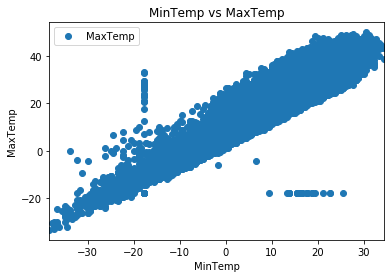

In [6]:
# x is the explantiroy/independt varibale and y is the response/dependent variable
# replace min-temp with our explanatroy variable(tempMaksed), go to the paper for that 
# max temp is repsonse variable which is yieldsMasked
# We are using tempature as the independent
# We want to repalce max temp with the yield variable

# What's going onnblow is that we are plotting a 2D graph 
# This helps us understadn the realtionship of the data a glance
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

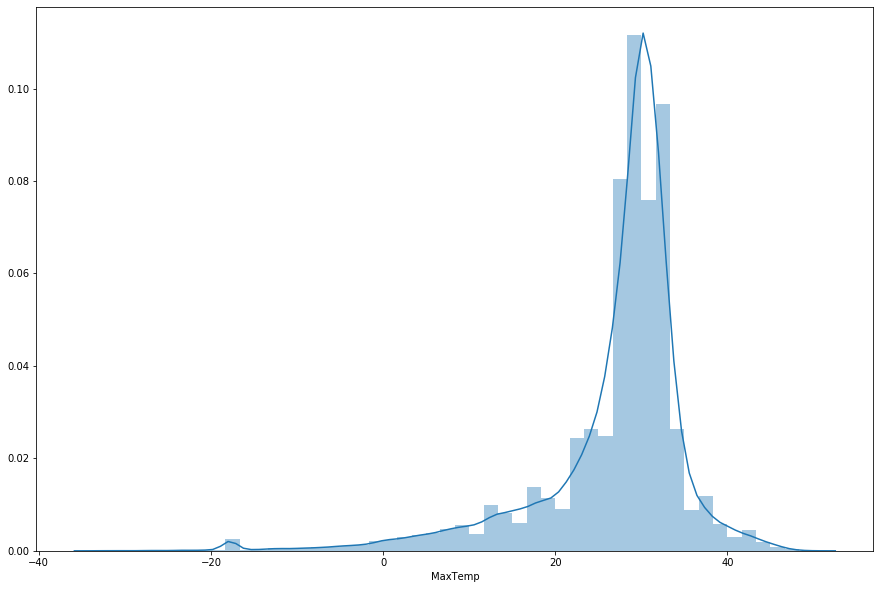

In [7]:
# This explores the max temp 
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [8]:
# We are makinga ttributes and lables which will be used for our 
# libear regression methods and traing models
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [9]:
# This is splitting 80% of data into a training set while splitting 
# 20% into our test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# This is training our algorithm 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# The followung lets us see the value of our intercept and slope

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [12]:
# This allows us to make predecitions on our codes 
y_pred = regressor.predict(X_test)

In [13]:
# This compares our actual output values to our predicted output 
# values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


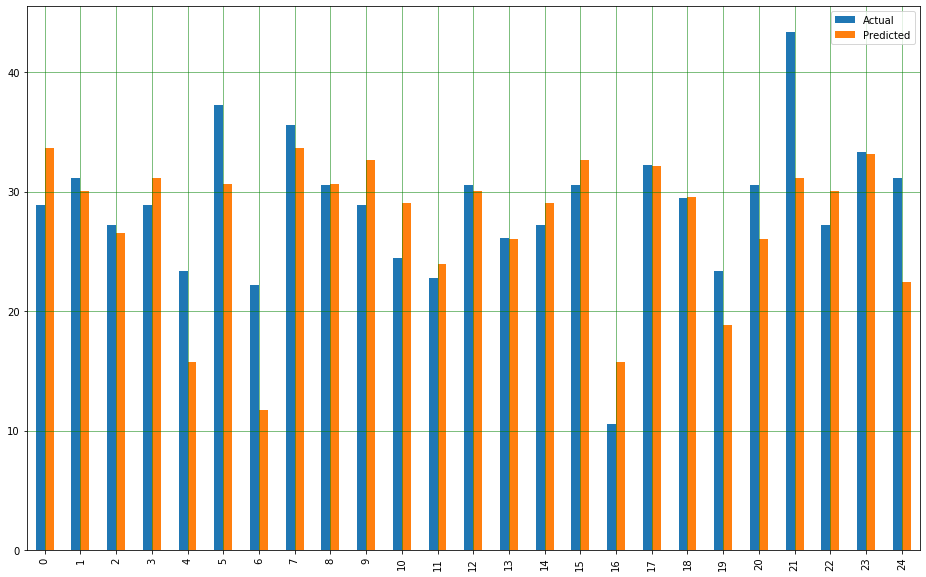

In [14]:
# Creating a bar graph to visualize the actual and predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

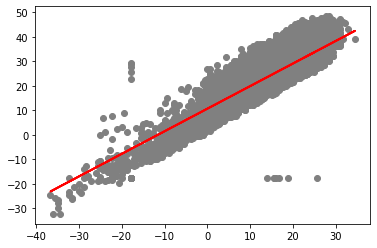

In [15]:
# They are fitting model to these things
# plotting line
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [16]:
# VERY IMPORTANT, this helps us understand the performance of 
# the algorithim 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


In [17]:
('Mean Absolute Error:', 3.19932917837853)
('Mean Squared Error:', 17.631568097568447)
('Root Mean Squared Error:', 4.198996082109204)

('Root Mean Squared Error:', 4.198996082109204)

In [51]:
# Messing around with our Data

# Reading in our yields and gloabal temo data
Yields = pd.read_csv('/home/dgorrell/Downloads/FAOSTAT_data_10-8-2019.csv')
Temp = pd.read_csv('/home/dgorrell/Downloads/GlobalTemperatures.csv')

In [52]:
# Printing out Yields data
# Rice crop was picked
# many differnt variable scan be involved
Yields

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,5,American Samoa,5419,Yield,125,Cassava,1961,1961,hg/ha,133333,Fc,Calculated data
1,QC,Crops,5,American Samoa,5419,Yield,125,Cassava,1962,1962,hg/ha,133333,Fc,Calculated data
2,QC,Crops,5,American Samoa,5419,Yield,125,Cassava,1963,1963,hg/ha,136667,Fc,Calculated data
3,QC,Crops,5,American Samoa,5419,Yield,125,Cassava,1964,1964,hg/ha,126667,Fc,Calculated data
4,QC,Crops,5,American Samoa,5419,Yield,125,Cassava,1965,1965,hg/ha,75000,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,QC,Crops,181,Zimbabwe,5419,Yield,125,Cassava,2013,2013,hg/ha,46000,Fc,Calculated data
5818,QC,Crops,181,Zimbabwe,5419,Yield,125,Cassava,2014,2014,hg/ha,46424,Fc,Calculated data
5819,QC,Crops,181,Zimbabwe,5419,Yield,125,Cassava,2015,2015,hg/ha,46762,Fc,Calculated data
5820,QC,Crops,181,Zimbabwe,5419,Yield,125,Cassava,2016,2016,hg/ha,47017,Fc,Calculated data


In [53]:
# Printing out our temp data
Temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [54]:
# Creating a list of years present in our data

years = np.unique(Temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(Temp[Temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(Temp[Temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

In [55]:
years

array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [56]:
# This is giving mean of our gloabl temp
mean_temp_world

[8.719363636363637,
 7.9761428571428565,
 5.7798333333333325,
 8.388083333333334,
 8.469333333333333,
 8.355583333333334,
 8.849583333333333,
 9.022,
 6.743583333333333,
 7.985083333333333,
 7.185166666666667,
 8.772499999999999,
 8.6065,
 7.496749999999999,
 8.400333333333332,
 8.251916666666665,
 8.405666666666667,
 8.2215,
 6.781333333333333,
 7.694583333333334,
 7.691916666666667,
 7.8531666666666675,
 8.1935,
 8.2215,
 8.772166666666665,
 9.183083333333334,
 8.304,
 8.256250000000001,
 8.54225,
 8.98325,
 9.432916666666667,
 8.102583333333333,
 7.90125,
 7.680833333333333,
 7.862000000000001,
 7.3629999999999995,
 8.258166666666666,
 8.031833333333333,
 8.447166666666666,
 8.334166666666667,
 7.982333333333333,
 8.23425,
 8.089,
 8.229166666666666,
 8.526000000000002,
 8.350333333333333,
 8.270999999999999,
 8.510583333333335,
 8.670250000000001,
 8.505749999999999,
 8.484250000000001,
 8.589666666666668,
 8.578166666666666,
 8.503,
 8.844833333333334,
 8.56275,
 8.434083333333332

In [57]:
# This gives us the mean of our yield data by year for our 
# value resutls
meanByYear = Yields.groupby("Year")["Value"].mean()

In [58]:
# printing out our mean by year values
meanByYear.values

array([ 82364.8989899 ,  83756.88888889,  83122.50505051,  84791.3030303 ,
        84926.26262626,  84816.14      ,  84870.85      ,  84321.42      ,
        84369.33663366,  86016.52475248,  86255.30693069,  87644.27722772,
        87254.88118812,  86281.85148515,  86892.5049505 ,  86420.18811881,
        85197.17821782,  85928.43564356,  86742.88118812,  87167.92079208,
        87661.96039604,  86438.6039604 ,  86791.12871287,  86674.54901961,
        88002.25742574,  87282.74257426,  88106.64356436,  88731.02941176,
        89122.7184466 ,  89004.82524272,  90055.54901961,  90819.91176471,
        90851.75728155,  90545.44660194,  89429.14423077,  90532.        ,
        90699.44660194,  89846.05825243,  94368.51923077,  95704.875     ,
        98039.74038462,  97917.63461538,  99074.02884615, 102876.25961538,
       100270.16346154, 103038.38834951, 102541.81730769, 103820.57692308,
       105880.39423077, 106189.43269231, 108085.72115385, 109701.91346154,
       110228.70192308, 1

In [59]:
# Printing index of mean by year 
meanByYear.index

Int64Index([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017],
           dtype='int64', name='Year')

In [60]:
# This is giving us the rolling position of each year
# Are there any inconsistent numbers in years? No it looks good
np.roll(meanByYear.index, 1) - meanByYear.index

Int64Index([56, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
            -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
            -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
            -1, -1, -1, -1, -1, -1],
           dtype='int64', name='Year')

In [ ]:
# copy of array casted as number in years column
yearsTemp = years.astype("int")

In [ ]:
# Printing of years temp 
yearsTemp

In [61]:
# printing the rolling position of years temp by -1 
np.roll(yearsTemp, 1) - yearsTemp

array([265,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -

In [62]:
# printing out years temp and mean by year in yields index min(s)
minAll = max([yearsTemp.min(),meanByYear.index.min()])
minAll

1961

In [63]:
# printing out years temp and mean by year in yields index max(s)
maxAll = min([yearsTemp.max(),meanByYear.index.max()])
maxAll

2015

In [64]:
yearsMaskedTemp = yearsTemp[(yearsTemp >= minAll) & (yearsTemp <= maxAll)]
tempMasked = np.array(mean_temp_world)[(yearsTemp >= minAll) & (yearsTemp <= maxAll)]

In [ ]:
yearsMaskedYields = meanByYear.index[(meanByYear.index >= minAll) & (meanByYear.index <= maxAll)]
yieldMasked = meanByYear.values[(meanByYear.index >= minAll) & (meanByYear.index <= maxAll)]

In [65]:
# This helps us explore the data by giving us the number 
# of rows and columns  
yearsMaskedTemp.shape

(55,)

In [66]:
# This helps us explore the data by giving us the number 
# of rows and columns 
tempMasked.shape

(55,)

In [ ]:
# This helps us explore the data by giving us the number 
# of rows and columns 
yieldMasked.shape

In [67]:
# We are makinga ttributes and lables which will be used for our 
# Libear regression methods and traing models

# New models from very top re-vamped tofit the very previous data.
X = tempMasked.reshape(-1,1)
y = yieldMasked.reshape(-1,1)

In [68]:
# This is splitting 80% of data into a training set while splitting 
# 20% into our test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
# This is training our algorithm 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# The followung lets us see the value of our intercept and slope

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-75052.76392603]
[[11606.64753911]]


In [71]:
# This allows us to make predecitions on our codes 
y_pred = regressor.predict(X_test)

In [72]:
# This compares our actual output values to our predicted output 
# values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,35775.974359,35587.603741
1,31534.965812,29856.821518
2,32961.974790,34218.986552
3,29353.469027,29342.260144
4,24042.035088,23598.904053
5,22552.354545,27735.706680
6,31012.313559,27858.543700
7,34541.478992,33174.388273
8,35830.711864,37905.064366
9,31379.180180,31489.489939


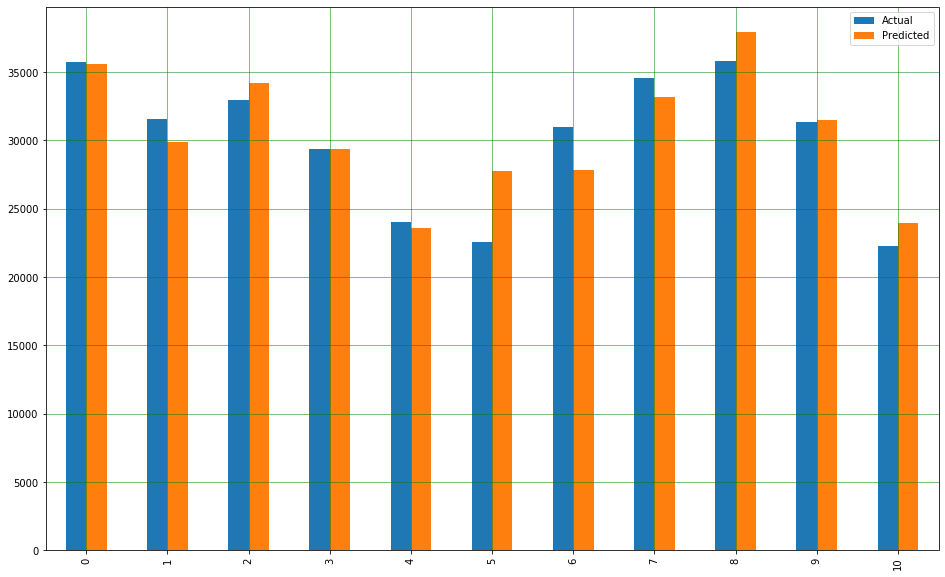

In [73]:
# Creating a bar graph to visualize the actual and predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

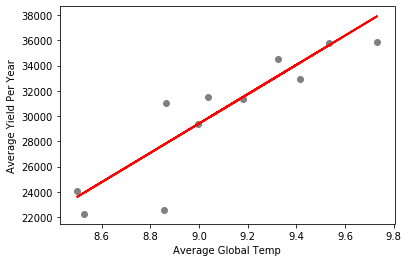

In [79]:

# They are fitting model and creating line
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Average Global Temp") 
plt.ylabel("Average Yield Per Year")
plt.show()

In [75]:
# VERY IMPORTANT, this helps us understand the performance of 
# the algorithim 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1557.665870855473
Mean Squared Error: 4582409.222907641
Root Mean Squared Error: 2140.6562598669693


In [76]:
# If you feel fancy how would you mask out one country instead of everything! 
    # I don't understand mask, need help!

In [77]:
tempMasked

array([8.79766667, 8.74591667, 8.856     , 8.40966667, 8.52741667,
       8.59933333, 8.70008333, 8.51633333, 8.59508333, 8.70091667,
       8.59925   , 8.49958333, 8.94825   , 8.4675    , 8.74483333,
       8.34725   , 8.85025   , 8.69275   , 8.73341667, 8.98033333,
       9.16583333, 8.63916667, 9.02816667, 8.69183333, 8.658     ,
       8.83358333, 8.99441667, 9.20158333, 8.922     , 9.23416667,
       9.17941667, 8.83658333, 8.86658333, 9.03875   , 9.34708333,
       9.03891667, 9.20258333, 9.52266667, 9.28508333, 9.20116667,
       9.41458333, 9.57041667, 9.52558333, 9.32458333, 9.70091667,
       9.5325    , 9.73216667, 9.43175   , 9.50525   , 9.70308333,
       9.516     , 9.50733333, 9.6065    , 9.57066667, 9.831     ])

In [78]:
mean_temp_world

[8.719363636363637,
 7.9761428571428565,
 5.7798333333333325,
 8.388083333333334,
 8.469333333333333,
 8.355583333333334,
 8.849583333333333,
 9.022,
 6.743583333333333,
 7.985083333333333,
 7.185166666666667,
 8.772499999999999,
 8.6065,
 7.496749999999999,
 8.400333333333332,
 8.251916666666665,
 8.405666666666667,
 8.2215,
 6.781333333333333,
 7.694583333333334,
 7.691916666666667,
 7.8531666666666675,
 8.1935,
 8.2215,
 8.772166666666665,
 9.183083333333334,
 8.304,
 8.256250000000001,
 8.54225,
 8.98325,
 9.432916666666667,
 8.102583333333333,
 7.90125,
 7.680833333333333,
 7.862000000000001,
 7.3629999999999995,
 8.258166666666666,
 8.031833333333333,
 8.447166666666666,
 8.334166666666667,
 7.982333333333333,
 8.23425,
 8.089,
 8.229166666666666,
 8.526000000000002,
 8.350333333333333,
 8.270999999999999,
 8.510583333333335,
 8.670250000000001,
 8.505749999999999,
 8.484250000000001,
 8.589666666666668,
 8.578166666666666,
 8.503,
 8.844833333333334,
 8.56275,
 8.434083333333332